Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [2]:
df = pd.read_csv("E:/Siva/SSSIHL/MSc Data Science/1st Sem/102 Lab/final/laptop/laptops.csv")
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.00
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.80
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.00


Data Preprocessing

In [3]:
# Checking for null values in all columns
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [4]:
os_ver_val = df['Operating System Version'].value_counts()
os_ver_val

Operating System Version
10      819
7        10
10 S      8
X         4
Name: count, dtype: int64

In [5]:
null_rows = df[df['Operating System Version'].isnull()]
null_rows

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,Lenovo,IdeaPad 310-15IKB,Notebook,"15.6""",Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 920MX,No OS,NaN,2.2kg,6091020.00
949,Acer,Chromebook 14,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,NaN,1.68kg,3103308.00
953,Asus,Chromebook Flip,2 in 1 Convertible,"12.5""",Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,NaN,1.2kg,10305828.00
959,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,"11.6""",IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,NaN,1.25kg,3458988.00


In [6]:
df['Operating System Version'].value_counts()

Operating System Version
10      819
7        10
10 S      8
X         4
Name: count, dtype: int64

In [7]:
# Now, here it's really tough to handle the missing values as each product is of different manufacture, OS and depends on several other factors
# We might drop the missing values, but that may lead to data loss.
# So to keep the data available, and the most used OS Version is 10, so let's replace missing values with 10
df['Operating System Version'].mode()[0]

'10'

In [8]:
df['Operating System Version'] = df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])

In [9]:
#in roman language x is 10 and also 10 s will  be 10 so we used str funtion to get right values
df['Operating System Version'].unique()

array(['10', 'X', '10 S', '7'], dtype=object)

In [10]:
# In roman language X is 10, so let's replace X with 10
df['Operating System Version'] = df['Operating System Version'].str.replace('X','10')

In [11]:
df['Operating System Version'].unique()

array(['10', '10 S', '7'], dtype=object)

In [12]:
# Also, let's replace '10 S' with 10
df['Operating System Version'] = df['Operating System Version'].str.replace('10 S','10')

In [13]:
df['Operating System Version'].unique()

array(['10', '7'], dtype=object)

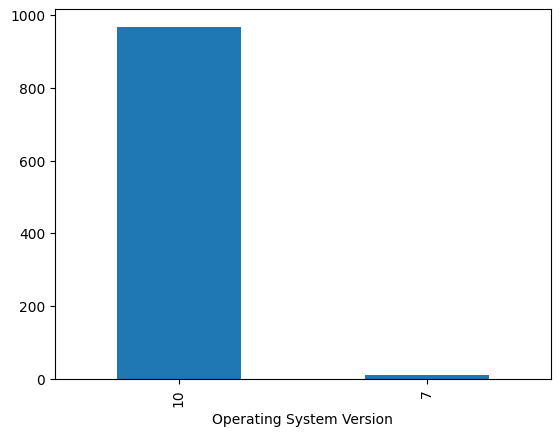

In [14]:
df['Operating System Version'].value_counts().plot(kind='bar')
plt.show()

In [15]:
#we check data types and fix and convert to int and float to minimize data according to situations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  977 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


Now, we need to convert all the columns into int or float datatype

In [16]:
df['Screen Size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [17]:
#its object type so we need to minimize to int or float according to condition
df['Screen Size'].str.replace('"','')

0      13.3
1      13.3
2      15.6
3      15.4
4      13.3
       ... 
972    17.3
973    14.0
974    17.3
975    15.6
976    14.0
Name: Screen Size, Length: 977, dtype: object

In [18]:
df['Screen Size'] = df['Screen Size'].str.replace('"','')
df['Screen Size'] = df['Screen Size'].astype('float')

In [19]:
df['Screen Size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 977 entries, 0 to 976
Series name: Screen Size
Non-Null Count  Dtype  
--------------  -----  
977 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [20]:
df['Screen'].value_counts()

Screen
Full HD 1920x1080                                397
IPS Panel Full HD 1920x1080                      181
1366x768                                         180
Full HD / Touchscreen 1920x1080                   38
IPS Panel Full HD / Touchscreen 1920x1080         35
1600x900                                          19
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
4K Ultra HD 3840x2160                              5
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Panel 2560x1440                    

Now, we segment the values of Screen into smaller unique values basing on Touch Screen and Non touch screen<br>
Let's write a function for it

In [21]:
def fun(display):
    if 'Touchscreen' in display:
        return 'Touch'
    else:
        return 'Non Touch'

In [22]:
df['Screen'] = df['Screen'].apply(fun)

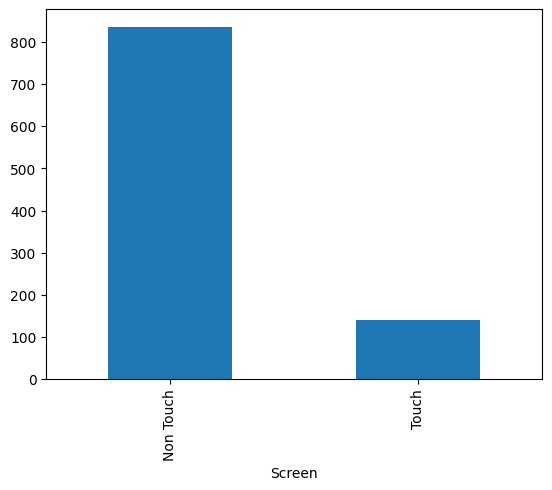

In [23]:
df['Screen'].value_counts().plot(kind='bar')
plt.show()

In [24]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Non Touch,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,HP,250 G6,Notebook,15.6,Non Touch,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Non Touch,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


In [25]:
df['CPU'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [26]:
def fun(cpu):
    if 'i3' in cpu:
        return 'i3'
    elif 'i5'in cpu:
        return 'i5'
    elif 'i7' in cpu:
        return 'i7'
    else:
        return 'others'

In [27]:
df['CPU'] = df['CPU'].apply(fun)

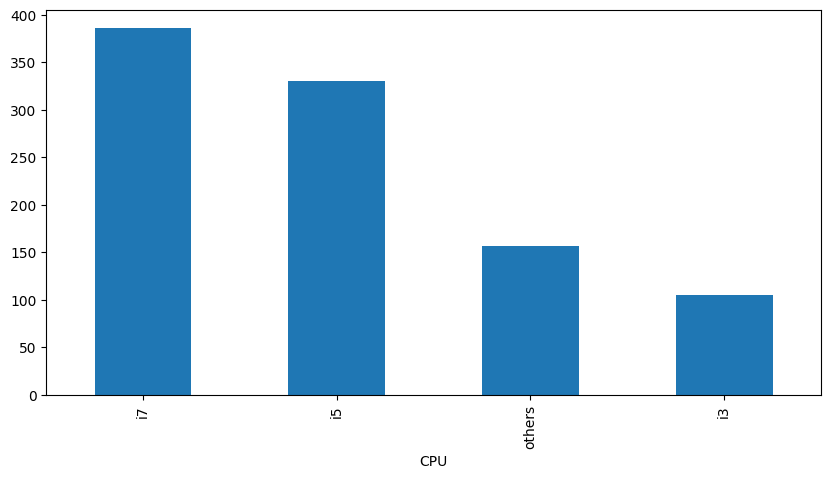

In [28]:
plt.figure(figsize=(10,5))
df['CPU'].value_counts().plot(kind='bar')
plt.show()

In [29]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Non Touch,i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,HP,250 G6,Notebook,15.6,Non Touch,i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Non Touch,i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


In [30]:
df['CPU'].value_counts()

CPU
i7        386
i5        330
others    156
i3        105
Name: count, dtype: int64

In [31]:
df['Storage'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid'], dtype=object)

In [32]:
# It's hard to handle this data, the only possible way is to classify to 4 types namely: SSD,HDD,Flash and others.
def fun(storage):
    if 'SSD' in storage:
        return 'SSD'
    elif 'HDD'in storage:
        return 'HDD'
    elif 'Flash' in storage:
        return 'Flash'
    else:
        return 'others'

In [33]:
df['Storage'] = df['Storage'].apply(fun)

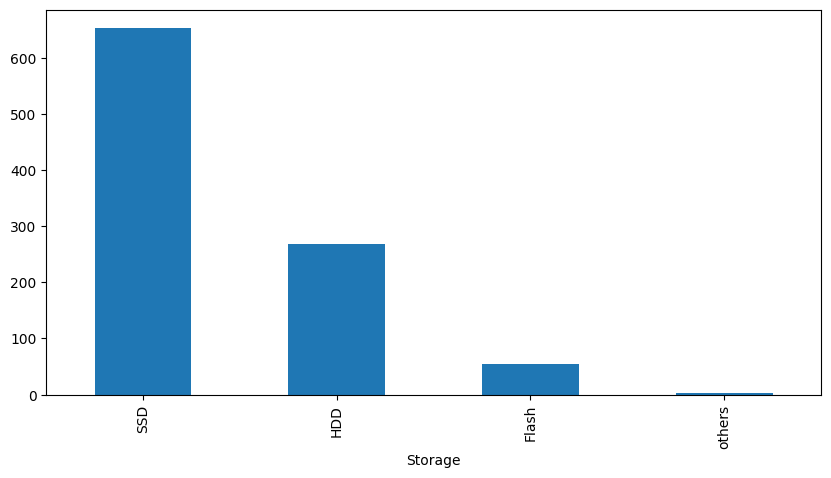

In [34]:
plt.figure(figsize=(10,5))
df['Storage'].value_counts().plot(kind='bar')
plt.show()

In [35]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8GB,SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Non Touch,i5,8GB,Flash,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,HP,250 G6,Notebook,15.6,Non Touch,i5,8GB,SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Non Touch,i7,16GB,SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8GB,SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


In [36]:
df['RAM'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB'],
      dtype=object)

In [37]:
# As we know that RAM is available only in GB, so handling this.
df['RAM'] = df['RAM'].str.split('GB').str[0]

In [38]:
df['RAM'] = df['RAM'].str.split('GB').str[0]
df['RAM'] = df['RAM'].astype('int')

In [39]:
df['RAM'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24])

In [40]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Non Touch,i5,8,Flash,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,HP,250 G6,Notebook,15.6,Non Touch,i5,8,SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Non Touch,i7,16,SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


In [41]:
df['GPU'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

Segmenting GPU types into smaller unique values as below:

In [42]:
def fun(gpu):
    if 'Nvidia' in gpu:
        return 'Nvidia'
    elif 'AMD' in gpu:
        return 'AMD'
    elif 'Intel' in gpu:
        return 'Intel'
    else:
        return 'others'

In [43]:
df['GPU'].apply(fun)

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
972    Nvidia
973     Intel
974    Nvidia
975    Nvidia
976     Intel
Name: GPU, Length: 977, dtype: object

In [44]:
df['GPU'] = df['GPU'].apply(fun)

In [45]:
df['GPU'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

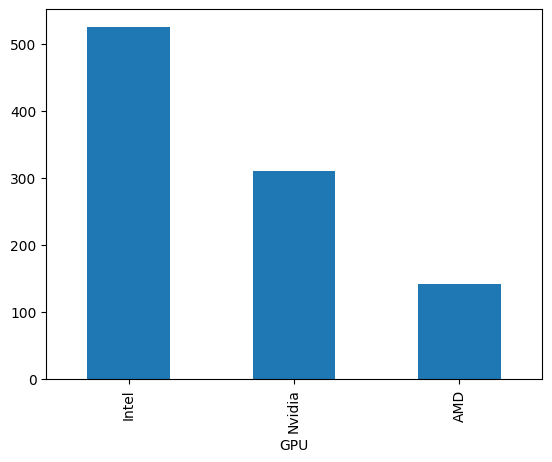

In [46]:
df['GPU'].value_counts().plot(kind='bar')
plt.show()

In [47]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,macOS,10,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Non Touch,i5,8,Flash,Intel,macOS,10,1.34kg,7993374.48
2,HP,250 G6,Notebook,15.6,Non Touch,i5,8,SSD,Intel,No OS,10,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Non Touch,i7,16,SSD,AMD,macOS,10,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,macOS,10,1.37kg,16037611.20


In [48]:
df['Operating System'].value_counts()

Operating System
Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: count, dtype: int64

In [49]:
# As we can observe macOS and Mac OS, let's combine them both with Mac OS by replacing macOS with Mac OS
df['Operating System'] = df['Operating System'].str.replace('macOS','Mac OS')

In [50]:
df['Operating System'].value_counts()

Operating System
Windows      837
No OS         52
Linux         48
Chrome OS     22
Mac OS        17
Android        1
Name: count, dtype: int64

In [51]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,Mac OS,10,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Non Touch,i5,8,Flash,Intel,Mac OS,10,1.34kg,7993374.48
2,HP,250 G6,Notebook,15.6,Non Touch,i5,8,SSD,Intel,No OS,10,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Non Touch,i7,16,SSD,AMD,Mac OS,10,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,Mac OS,10,1.37kg,16037611.20


In [52]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [53]:
# As we know that all laptops weigh in kg's only, so let's extract the numerical value
df['Weight'].str.split('kg').str[0].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '0.98', '2.5', '1.62', '1.91', '2.3', '1.35',
       '1.88', '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65',
       '2.77', '3.2', '0.69', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4',
       '1.8', '1.9', '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21',
       '2.45', '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23',
       '1.26', '2.16', '2.36', '2.05', '1.32', '1.75', '0.97', '2.9',
       '2.56', '1.48', '1.74', '1.1', '1.56', '2.03', '1.05', '4.4',
       '1.90', '1.29', '2.0', '1.95', '2.06', '1.12', '1.42', '3.49',
       '3.35', '2.23', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08',
       '4.3', '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '1.28', '2.33',
       '1.45', '2.79', '1.84', '2.6', '2.26', '3.25', '1.59', '1.13',
       '1.78', '1.10', '1.15', '1.27', '1.43', '2.31', '1.16', '1.64',
   

In [54]:
df['Weight'] = df['Weight'].str.split('kg').str[0]

In [55]:
df['Weight'] = df['Weight'].astype('float')

In [56]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,Mac OS,10,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Non Touch,i5,8,Flash,Intel,Mac OS,10,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,Non Touch,i5,8,SSD,Intel,No OS,10,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Non Touch,i7,16,SSD,AMD,Mac OS,10,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,Mac OS,10,1.37,16037611.20


In [58]:
df['Price']

0      11912523.48
1       7993374.48
2       5112900.00
3      22563005.40
4      16037611.20
          ...     
972    24897600.00
973    10492560.00
974    18227710.80
975     8705268.00
976     8909784.00
Name: Price, Length: 977, dtype: float64

In [59]:
# As most of the laptop prices will be in lakhs and not crores, so let's get price in lakhs
df['Price'].astype('str').str[:7]

0      1191252
1      7993374
2      5112900
3      2256300
4      1603761
        ...   
972    2489760
973    1049256
974    1822771
975    8705268
976    8909784
Name: Price, Length: 977, dtype: object

In [60]:
df['Price'] = df['Price'].astype('str').str[:7]

In [61]:
df['Price'] = df['Price'].astype('int')

In [62]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,Mac OS,10,1.37,1191252
1,Apple,Macbook Air,Ultrabook,13.3,Non Touch,i5,8,Flash,Intel,Mac OS,10,1.34,7993374
2,HP,250 G6,Notebook,15.6,Non Touch,i5,8,SSD,Intel,No OS,10,1.86,5112900
3,Apple,MacBook Pro,Ultrabook,15.4,Non Touch,i7,16,SSD,AMD,Mac OS,10,1.83,2256300
4,Apple,MacBook Pro,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,Mac OS,10,1.37,1603761


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    int32  
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  977 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    int32  
dtypes: float64(2), int32(2), object(9)
memory usage: 91.7+ KB


In [64]:
df.select_dtypes(include='object').nunique()

Manufacturer                 19
Model Name                  488
Category                      6
Screen                        2
CPU                           4
Storage                       4
GPU                           3
Operating System              6
Operating System Version      2
dtype: int64

In [65]:
df['Manufacturer'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [66]:
def fun(manu):
    if manu in ['Apple', 'HP', 'Dell', 'Lenovo', 'Microsoft']:
        return 'Top Brands'
    elif manu in ['Acer', 'Asus', 'MSI', 'Razer']:
        return 'Gaming Laptops'
    elif manu in ['Chuwi', 'Huawei', 'Xiaomi', 'Vero']:
        return 'Chinese Brands'
    else:
        return 'Other Brands'

In [67]:
df['Manufacturer'].apply(fun)

0          Top Brands
1          Top Brands
2          Top Brands
3          Top Brands
4          Top Brands
            ...      
972        Top Brands
973      Other Brands
974    Gaming Laptops
975        Top Brands
976        Top Brands
Name: Manufacturer, Length: 977, dtype: object

In [68]:
df['Manufacturer'] = df['Manufacturer'].apply(fun)

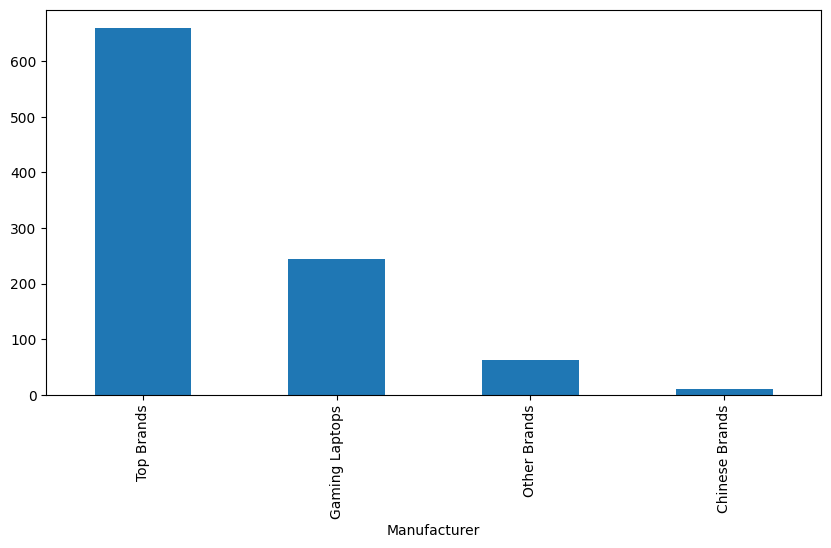

In [69]:
plt.figure(figsize=(10,5))
df['Manufacturer'].value_counts().plot(kind='bar')
plt.show()

In [70]:
df.select_dtypes(include='object').nunique()

Manufacturer                  4
Model Name                  488
Category                      6
Screen                        2
CPU                           4
Storage                       4
GPU                           3
Operating System              6
Operating System Version      2
dtype: int64

In [71]:
# Since we have all features required (manufacturer and category) and there are more number of unique values in Model Name.. also this feature is of less importance
# we dont need model name column, so let's drop it from the dataframe.
df.drop('Model Name',axis=1,inplace=True)

In [72]:
df['Category'].unique() # No need of any changes

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [73]:
df

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Top Brands,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,Mac OS,10,1.37,1191252
1,Top Brands,Ultrabook,13.3,Non Touch,i5,8,Flash,Intel,Mac OS,10,1.34,7993374
2,Top Brands,Notebook,15.6,Non Touch,i5,8,SSD,Intel,No OS,10,1.86,5112900
3,Top Brands,Ultrabook,15.4,Non Touch,i7,16,SSD,AMD,Mac OS,10,1.83,2256300
4,Top Brands,Ultrabook,13.3,Non Touch,i5,8,SSD,Intel,Mac OS,10,1.37,1603761
...,...,...,...,...,...,...,...,...,...,...,...,...
972,Top Brands,Gaming,17.3,Non Touch,i7,32,SSD,Nvidia,Windows,10,4.42,2489760
973,Other Brands,Notebook,14.0,Non Touch,i5,8,SSD,Intel,Windows,10,1.95,1049256
974,Gaming Laptops,Gaming,17.3,Non Touch,i7,16,SSD,Nvidia,Windows,10,2.73,1822771
975,Top Brands,Notebook,15.6,Non Touch,i5,8,SSD,Nvidia,Windows,10,2.04,8705268


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Category                  977 non-null    object 
 2   Screen Size               977 non-null    float64
 3   Screen                    977 non-null    object 
 4   CPU                       977 non-null    object 
 5   RAM                       977 non-null    int32  
 6   Storage                   977 non-null    object 
 7   GPU                       977 non-null    object 
 8   Operating System          977 non-null    object 
 9   Operating System Version  977 non-null    object 
 10  Weight                    977 non-null    float64
 11  Price                     977 non-null    int32  
dtypes: float64(2), int32(2), object(8)
memory usage: 84.1+ KB


Exploratory Data Analysis

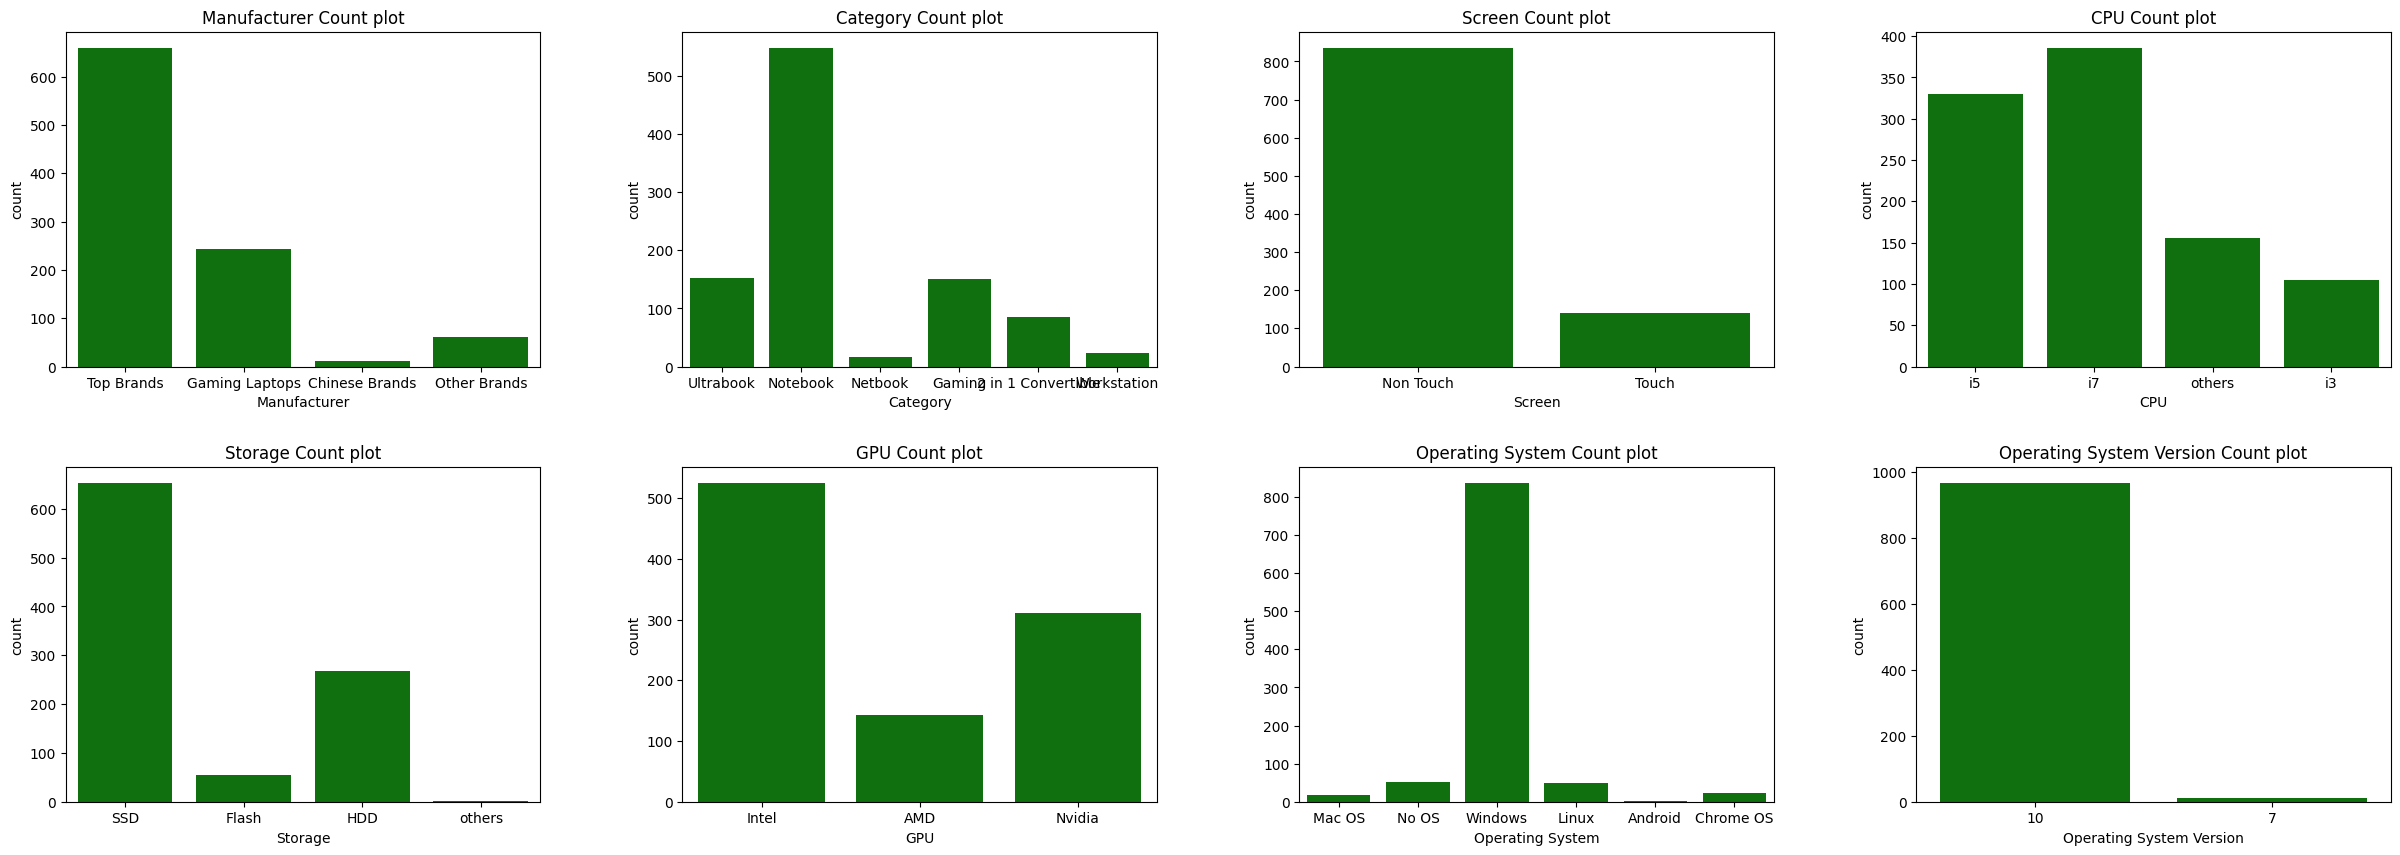

In [75]:
fig, axes = plt.subplots(2,4,figsize=(30,10)) # required rows,cols and plotsize
fig.subplots_adjust(hspace=0.3, wspace=0.3) # required height and width space between two sub plots
axs = axes.flatten()

obj_vars = df.select_dtypes(include='object')
for i, feature in enumerate (obj_vars):
    sns.countplot(x=feature,data=df,ax=axs[i],color="green")
    axs[i].set_title('{} Count plot'. format(feature))

plt.show()

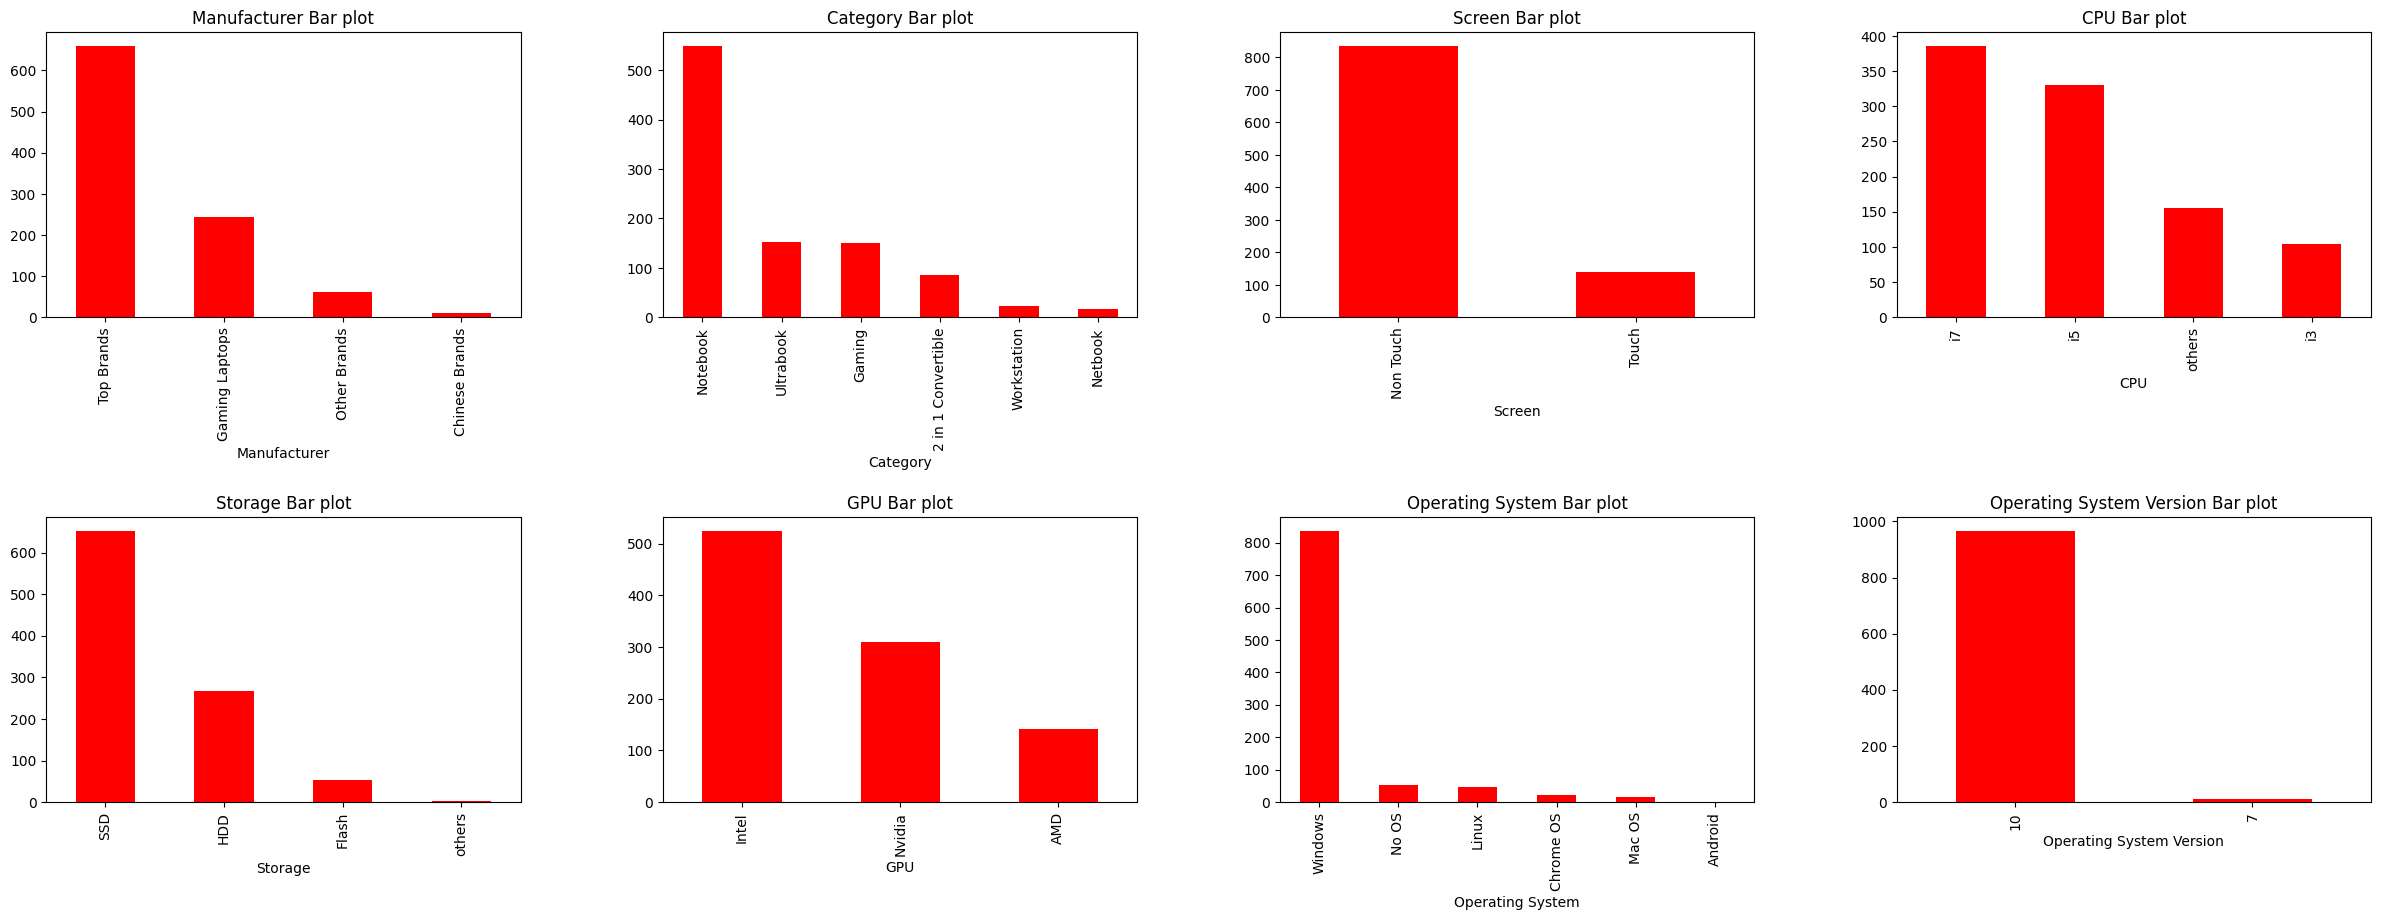

In [76]:
fig, axes = plt.subplots(2,4,figsize=(30,10)) # required rows,cols and plotsize
fig.subplots_adjust(hspace=0.7, wspace=0.3) # required height and width space between two sub plots
axs = axes.flatten()

obj_vars = df.select_dtypes(include='object')
for i, feature in enumerate (obj_vars):
    counts = df[feature].value_counts()
    counts.plot(kind="bar", ax=axs[i], color="red")
    axs[i].set_title('{} Bar plot'. format(feature))

plt.show()

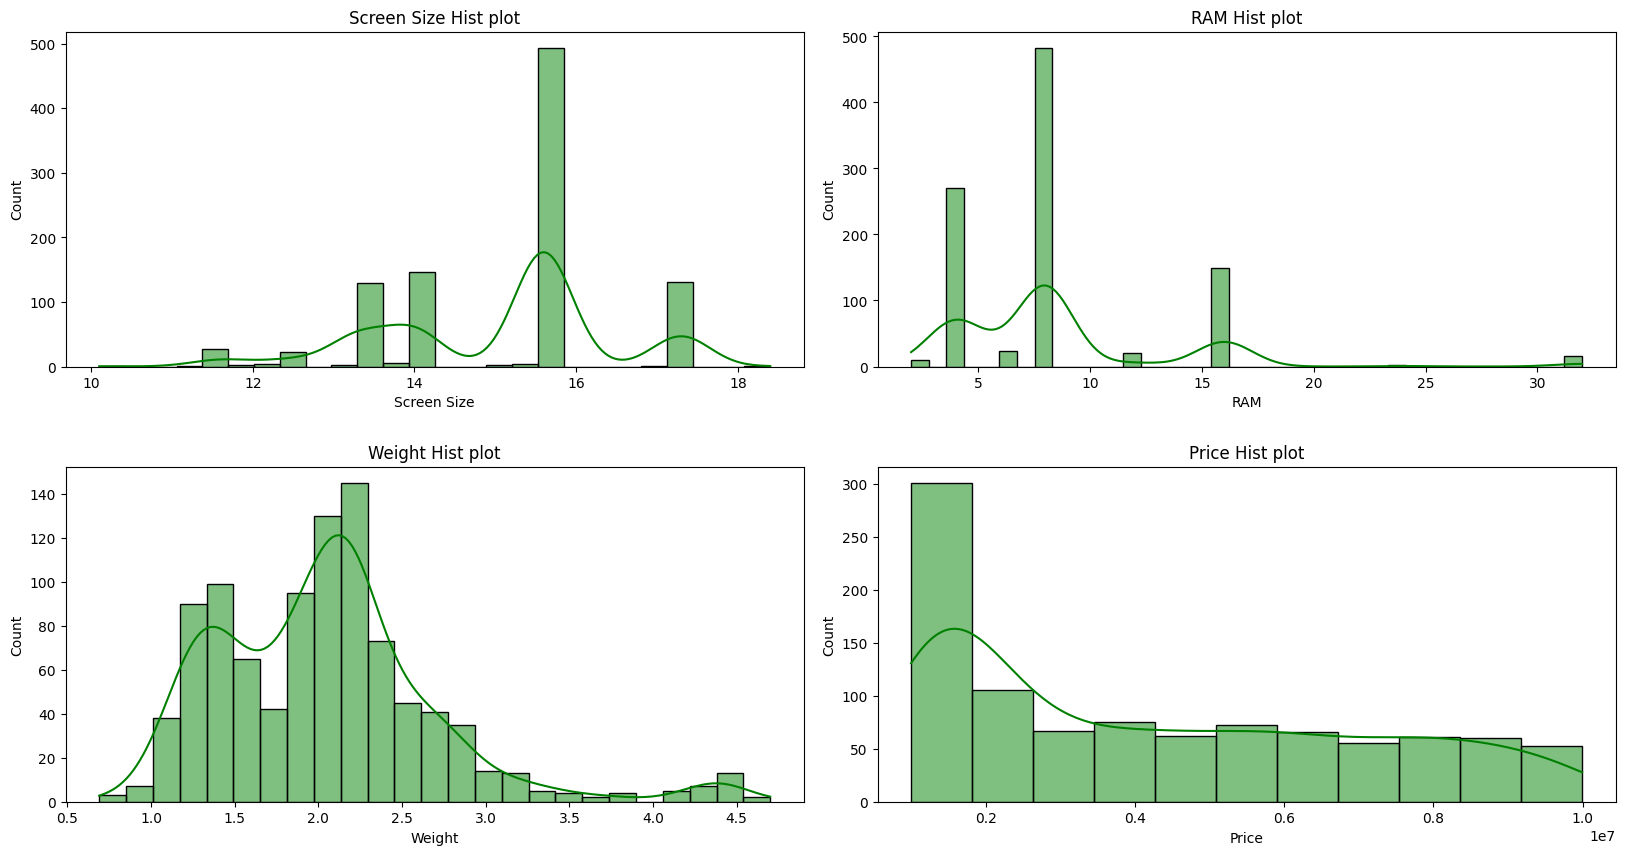

In [77]:
fig, axes = plt.subplots(2,2,figsize=(20,10)) # required rows,cols and plotsize
fig.subplots_adjust(hspace=0.3, wspace=0.1) # required height and width space between two sub plots
axs = axes.flatten()

cont_vars = df.select_dtypes(include=['int','float'])
for i, feature in enumerate (cont_vars):
    sns.histplot(ax=axs[i],kde=True,data=df,x=feature,color='green')
    axs[i].set_title('{} Hist plot'. format(feature))

plt.show()

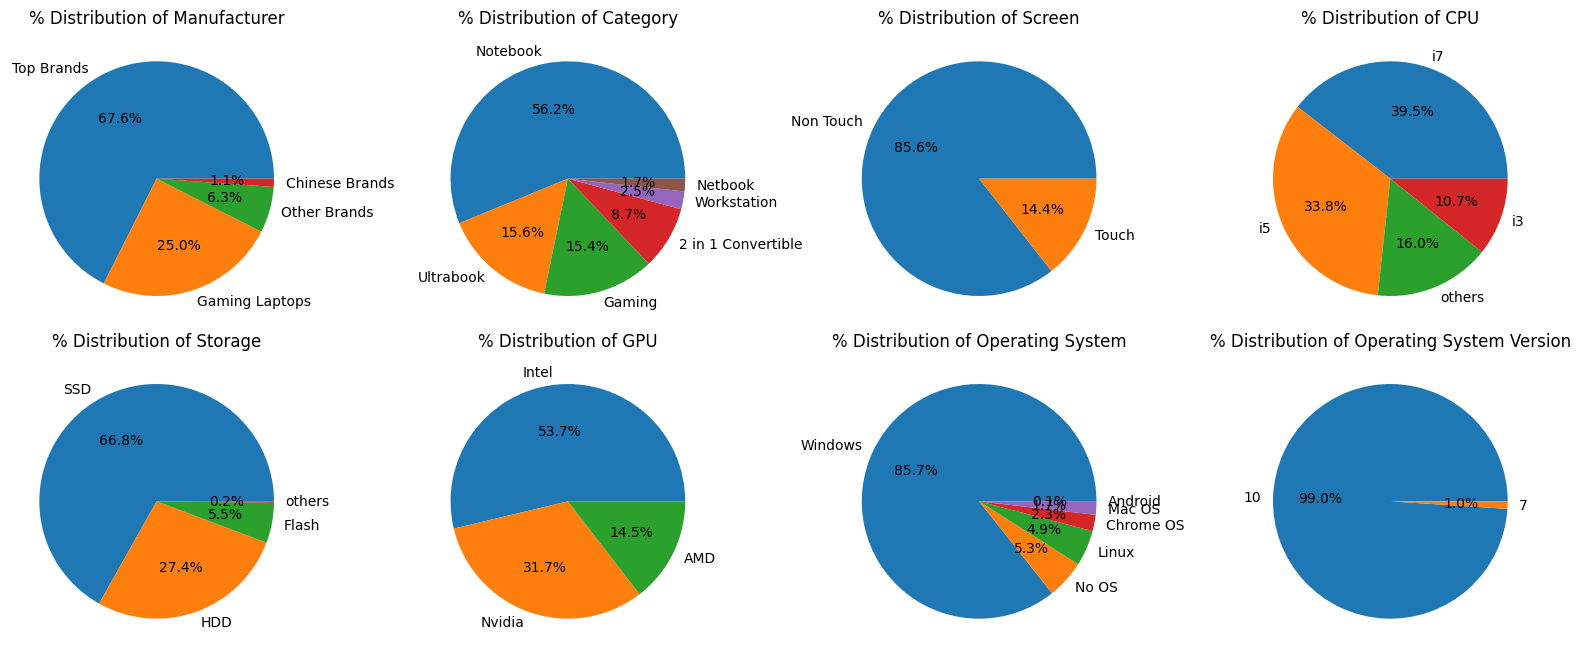

In [78]:
fig, axes = plt.subplots(2,4,figsize=(20,8)) # required rows,cols and plotsize
fig.subplots_adjust(hspace=0.1, wspace=0.3) # required height and width space between two sub plots
axs = axes.flatten()

obj_vars = df.select_dtypes(include='object').columns

for i, feature in enumerate (obj_vars):
    values = df[feature].value_counts()
    axs[i].pie(values, labels=values.index, autopct='%1.1f%%')
    axs[i].set_title('% Distribution of {}'.format(feature))

plt.show()


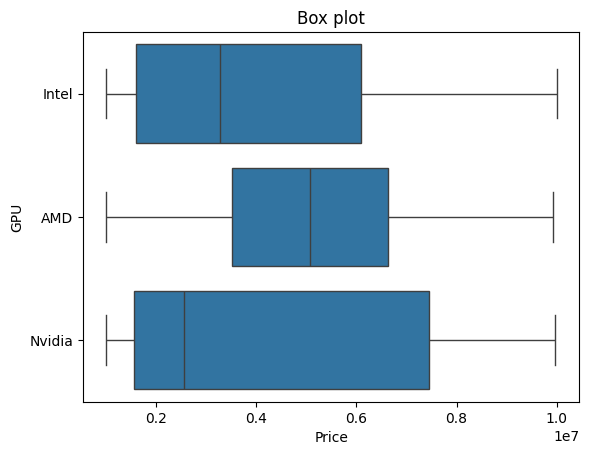

In [79]:
sns.boxplot(data=df,x='Price',y='GPU')
plt.title('Box plot')
plt.show()

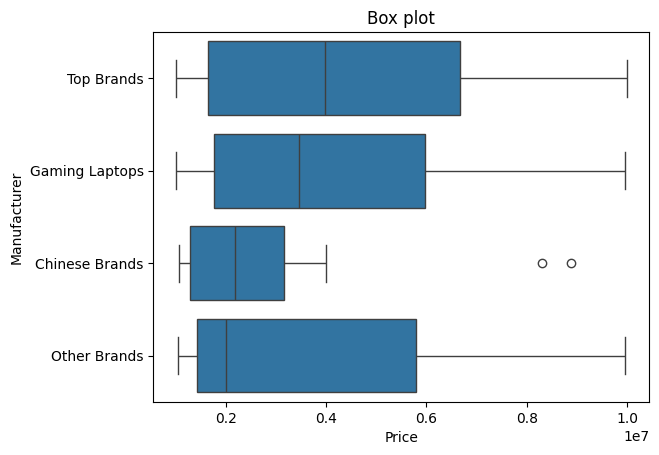

In [80]:
sns.boxplot(data=df,x='Price',y='Manufacturer')
plt.title('Box plot')
plt.show()

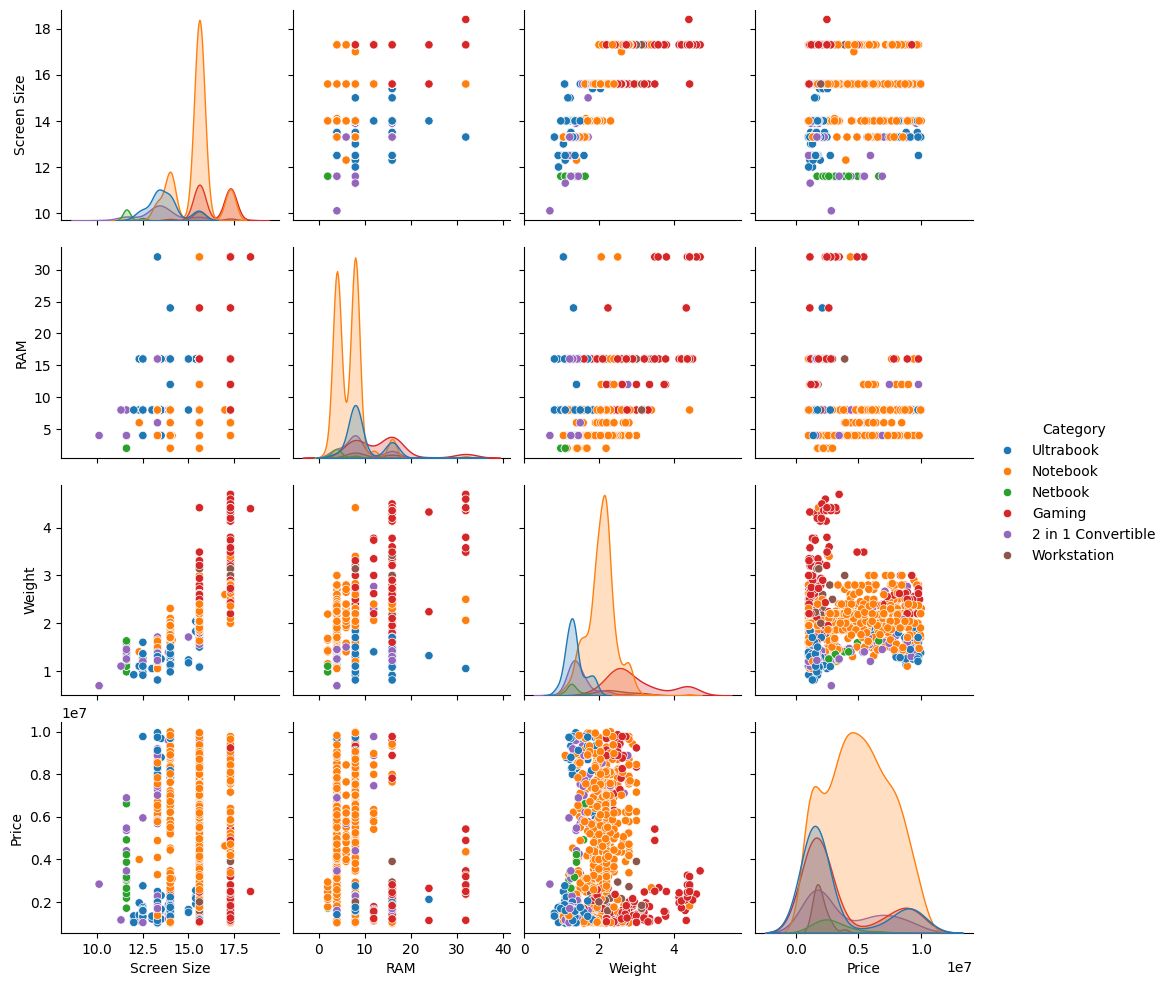

In [81]:
sns.pairplot(data=df,hue="Category")
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

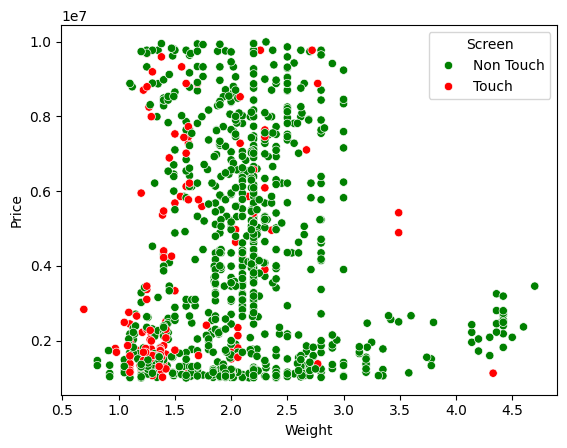

In [82]:
sns.scatterplot(data=df,x='Weight',y='Price',hue='Screen',palette=['green','red'])

<Axes: xlabel='Screen Size', ylabel='Price'>

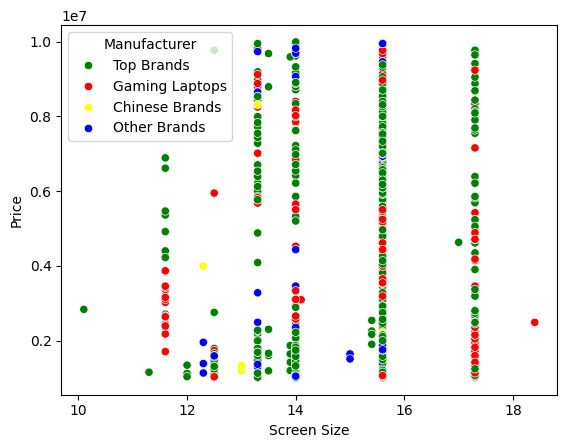

In [83]:
sns.scatterplot(data=df,x='Screen Size',y='Price',hue='Manufacturer',palette=['green','red','yellow','blue'])

Selecting the continous attributes to perform statistical tests, and before we start, let's check skewness of attributes, normalize them using boxcox transformation

In [84]:
cont_df= df.select_dtypes(include=['int', 'float'])

In [85]:
cont_df.skew()

Screen Size   -0.397473
RAM            2.078221
Weight         1.184921
Price          0.507658
dtype: float64

In [86]:
import scipy as scipy
from scipy import stats
# Using boxcox and finding the lambda value for all the attributes
transformed_df = pd.DataFrame()
lam_values = {}

for feature in cont_df.columns:
    x = cont_df[feature]
    arr, lam = stats.boxcox(x)
    transformed_df[feature] = arr
    lam_values[feature] = lam

# Printing lambda values for each numeric feature
for feature, lam in lam_values.items():
    print("{}: {}".format(feature, lam))

Screen Size: 2.5530744481914813
RAM: -0.19069331965440928
Weight: -0.05791356131221097
Price: 0.10846911482608998


In [87]:
transformed_skewval = {}

for feature in cont_df.columns:
    lam = lam_values[feature]
    boxcox = ( (cont_df[feature] ** lam) - 1 ) / lam
    transformed_skewval[feature] = boxcox.skew()
    
for feature, boxcox in transformed_skewval.items():
    print("{}: {}".format(feature, boxcox))

Screen Size: -0.03831087297389192
RAM: 0.00525303337232968
Weight: -0.00041547735459021134
Price: -0.0383403858639293


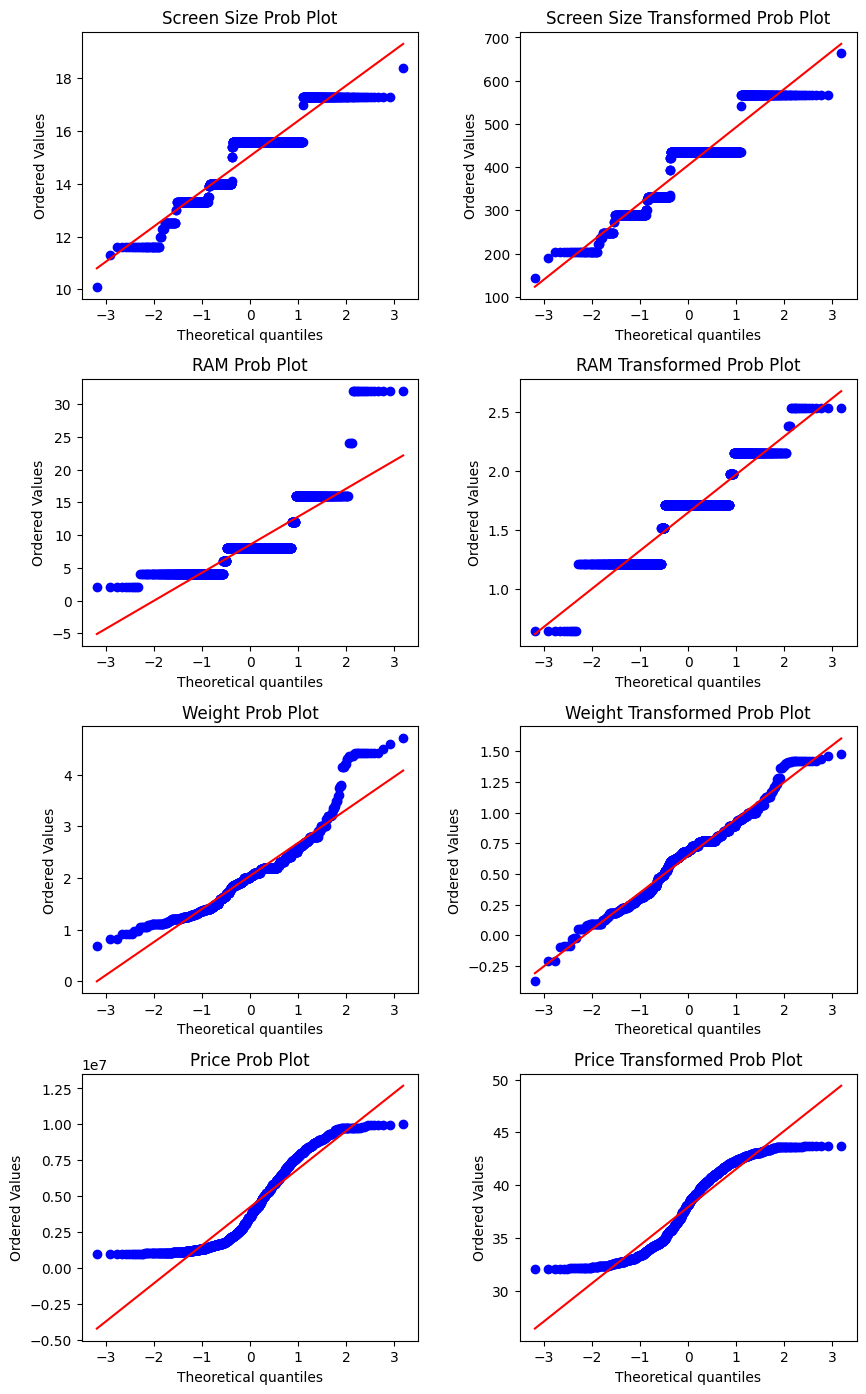

In [88]:
fig, axes = plt.subplots(4,2,figsize=(10,17)) # required rows,cols and plotsize
fig.subplots_adjust(hspace=0.3, wspace=0.3)

i=0
for feature in cont_df.columns:
    lam = lam_values[feature]
    boxcox = ( (cont_df[feature] ** lam) - 1 ) / lam
    transformed_skewval[feature] = boxcox.skew()
    stats.probplot(cont_df[feature],plot=axes[i,0])
    stats.probplot(boxcox,plot=axes[i,1])
    
    axes[i,0].set_title('{} Prob Plot'.format(feature))
    axes[i, 1].set_title('{} Transformed Prob Plot'.format(feature))

    i += 1

Testing Hypothesis

In [89]:
# To estimate µ

import math
alpha = 0.05
interval_estimation_mean = {}

for column in cont_df.columns:
    mean = cont_df[column].mean()
    n = len(cont_df)
    sample_variance = cont_df[column].var()
    standard_deviation = math.sqrt(sample_variance)
    t_value = stats.t.ppf(1 - (1 - alpha) / 2, n - 1)
    rhs = t_value * standard_deviation
    lb = mean - rhs
    ub = mean + rhs
    interval_estimation_mean[column] = (lb, ub)

In [90]:
for column, interval in interval_estimation_mean.items():
    print(f'{column} CI: ({interval[0]}, {interval[1]})')

Screen Size CI: (14.963609391273621, 15.141610670138864)
RAM CI: (8.214690507152184, 8.841604272786402)
Weight CI: (1.9973539001917735, 2.0809019851715838)
Price CI: (4068001.6264804304, 4417642.90166696)


In [91]:
cont_df.mean()

Screen Size    1.505261e+01
RAM            8.528147e+00
Weight         2.039128e+00
Price          4.242822e+06
dtype: float64

In [92]:
# To estimate µ when variance is not known and n is large.

alpha = 0.05
interval_estimation_z = {}

for column in cont_df.columns:
    mean = cont_df[column].mean()
    n = len(cont_df)
    sample_variance = cont_df[column].var()
    standard_deviation = math.sqrt(sample_variance)
    z_value = stats.norm.ppf(1 - (1 - alpha) / 2)
    rhs = z_value * standard_deviation
    lb = mean - rhs
    ub = mean + rhs
    interval_estimation_z[column] = (lb, ub)

In [93]:
for column, interval in interval_estimation_z.items():
    print(f'{column} CI: ({interval[0]}, {interval[1]})')

Screen Size CI: (14.963632275302528, 15.141587786109957)
RAM CI: (8.214771103835686, 8.8415236761029)
Weight CI: (1.9973646412201755, 2.080891244143182)
Price CI: (4068046.576725168, 4417597.951422222)


In [94]:
# To estimate Variance

alpha = 0.05
interval_estimation_var = {}

for column in cont_df.columns:
    mean = cont_df[column].mean()
    n = len(cont_df)
    sample_variance = cont_df[column].var()
    chi_lower = stats.chi2.ppf(alpha / 2, n-1)
    chi_upper = stats.chi2.ppf(1 - alpha / 2, n-1)
    lb = ((n - 1) * sample_variance) / chi_upper
    ub = ((n - 1) * sample_variance) / chi_lower
    interval_estimation_var[column] = (lb, ub)

print('chi_lower',chi_lower)
print('chi_upper',chi_upper)

chi_lower 891.3155497191265
chi_upper 1064.472503438975


In [95]:
for column, interval in interval_estimation_var.items():
    print(f'{column} CI: ({interval[0]}, {interval[1]})')

Screen Size CI: (1.8460747817093386, 2.2047139703115746)
RAM CI: (22.899112816936437, 27.347751258751302)
Weight CI: (0.4067017528480328, 0.48571219602708426)
Price CI: (7122762040843.634, 8506509668103.714)


In [96]:
cont_df.var()

Screen Size    2.013418e+00
RAM            2.497487e+01
Weight         4.435685e-01
Price          7.768427e+12
dtype: float64

$$ H_0: µ = µ0 vs H_1 : µ \neq µ0 $$

In [97]:
def Testing_Hypothesis(array,alpha,µ0):
    n = len(array)
    mean = array.mean()
    var = array.var()
    z_cal = (mean - µ0) / (np.sqrt(var / n))
    p = 2 * (1 - stats.norm.cdf(np.abs(z_cal)))

    if p < alpha:
        print('Reject µ0')
    else:
        print('Do not reject µ0')

In [99]:
Testing_Hypothesis(df['Weight'],0.05,1.56)

Reject µ0


In [101]:
Testing_Hypothesis(df['Weight'],0.1,3.56)

Reject µ0


In [102]:
Testing_Hypothesis(df['Price'],0.05,223000)

Reject µ0


In [103]:
Testing_Hypothesis(df['Price'],0.05,4231125)

Do not reject µ0


In [104]:
Testing_Hypothesis(df['Screen Size'],0.05,15.10)

Do not reject µ0


In [105]:
Testing_Hypothesis(df['Screen Size'],0.1,12)

Reject µ0


In [106]:
Testing_Hypothesis(df['RAM'],0.05,8)

Reject µ0


In [107]:
Testing_Hypothesis(df['RAM'],0.1,16)

Reject µ0


$$ H_0: σ0 = σ2 vs H_1 : σ0 \neq σ2 $$

In [109]:
def Testing_Hypothesis_Var(array, alpha, sigma0):
    n = len(array)
    var = array.var(ddof=1)  
    chi_square = (n - 1) * var / sigma0
    p = 1 - stats.chi2.cdf(chi_square, df=n - 1)

    if p < alpha:
        print('Reject σ^2')
    else:
        print('Do not reject σ^2')


In [110]:
Testing_Hypothesis_Var(df['Weight'], 0.05, 2.56)

Do not reject σ^2


In [111]:
Testing_Hypothesis_Var(df['Price'], 0.05, 784692.45)

Reject σ^2


In [112]:
Testing_Hypothesis_Var(df['Screen Size'], 0.1, 13)

Do not reject σ^2


In [113]:
Testing_Hypothesis_Var(df['RAM'], 0.1, 16)

Reject σ^2
